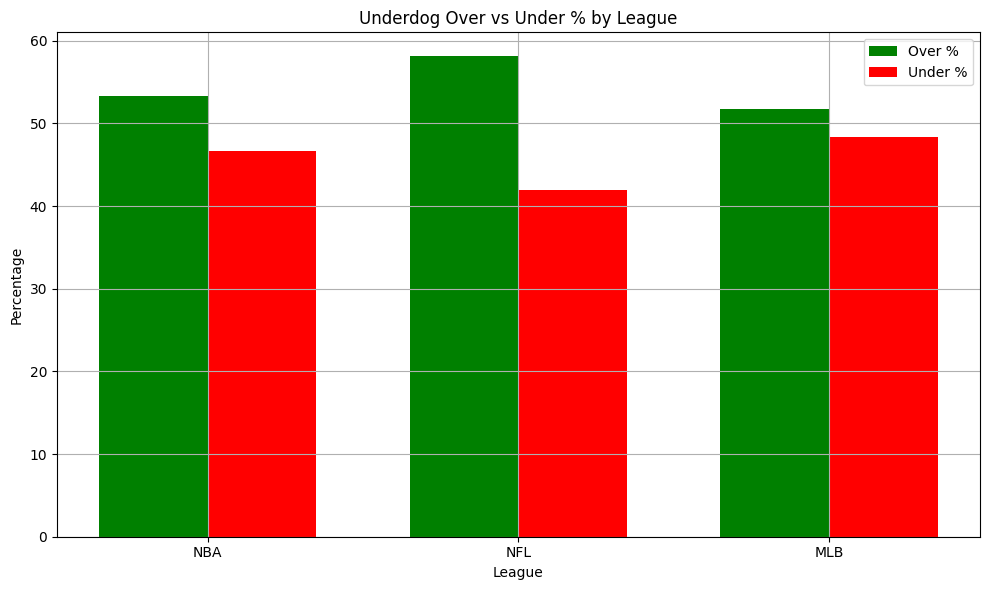

/tmp/ipykernel_53287/435437455.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined, x='League', y='Total_Diff', palette='coolwarm')


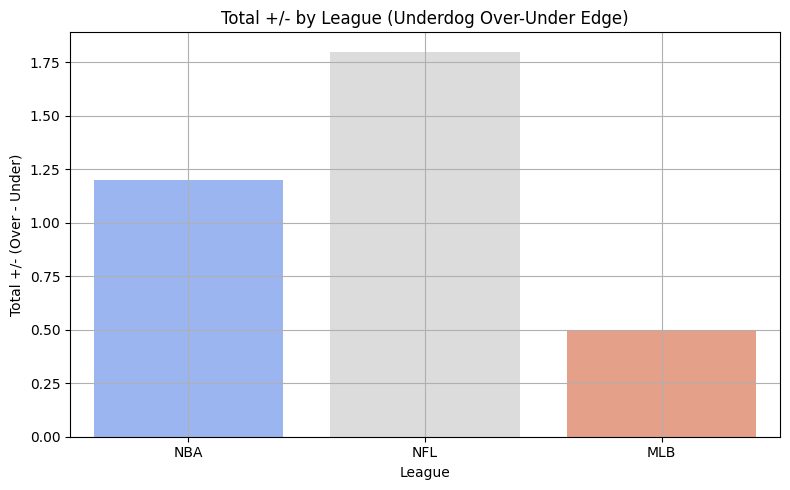

,League,Team,Over_PCT,Under_PCT,Total_Diff
0,NBA,Indiana,53.3,46.7,1.2
1,NFL,New England,58.1,41.9,1.8
2,MLB,LA Angels,51.7,48.3,0.5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Placeholder paths for the underdog data CSVs
nba_path = '/workspaces/Data-Science-Final-Project/NBA/data/underdog_nba_ov.csv'
nfl_path = '/workspaces/Data-Science-Final-Project/NBA/data/underdog_nfl_ov.csv'
mlb_path = '/workspaces/Data-Science-Final-Project/NBA/data/underdog_mlbl_ov.csv'

# Load the data
nba_df = pd.read_csv(nba_path)
nfl_df = pd.read_csv(nfl_path)
mlb_df = pd.read_csv(mlb_path)

# Extract the first (or only) row from each for comparison
nba_team = nba_df.iloc[0]
nfl_team = nfl_df.iloc[0]
mlb_team = mlb_df.iloc[0]

# Create a DataFrame for analysis
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': [nba_team['Team'], nfl_team['Team'], mlb_team['Team']],
    'Over_PCT': [float(nba_team['Over_PCT']), float(nfl_team['Over_PCT']), float(mlb_team['Over_PCT'])],
    'Under_PCT': [float(nba_team['Under_PCT']), float(nfl_team['Under_PCT']), float(mlb_team['Under_PCT'])],
    'Total_Diff': [float(nba_team['Total_+/-']), float(nfl_team['Total_+/-']), float(mlb_team['Total_+/-'])]
}
df_combined = pd.DataFrame(data)

# Plot Over/Under Percentages
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_combined))

plt.bar(x, df_combined['Over_PCT'], width=bar_width, label='Over %', color='green')
plt.bar([p + bar_width for p in x], df_combined['Under_PCT'], width=bar_width, label='Under %', color='red')

plt.xlabel('League')
plt.ylabel('Percentage')
plt.title('Underdog Over vs Under % by League')
plt.xticks([p + bar_width / 2 for p in x], df_combined['League'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Total Difference
plt.figure(figsize=(8, 5))
sns.barplot(data=df_combined, x='League', y='Total_Diff', palette='coolwarm')
plt.title('Total +/- by League (Underdog Over-Under Edge)')
plt.ylabel('Total +/- (Over - Under)')
plt.grid(True)
plt.tight_layout()
plt.show()

df_combined


In [3]:
import pandas as pd

# Assuming this DataFrame already exists after loading and merging underdog O/U stats
# Replace with your actual combined DataFrame if named differently
# Example structure:
# df_underdog_combined =
#     League     Team     Over_PCT     Under_PCT     Total_Diff

# Rank by Over %
ranked_over = df_combined.sort_values(by="Over_PCT", ascending=False)
print("🔼 Ranking by Over Percentage:")
print(ranked_over[['League', 'Team', 'Over_PCT']])
print("\n")

# Rank by Under %
ranked_under = df_combined.sort_values(by="Under_PCT", ascending=False)
print("🔽 Ranking by Under Percentage:")
print(ranked_under[['League', 'Team', 'Under_PCT']])
print("\n")

# Rank by Total Betting Edge (Total_Diff)
ranked_total = df_combined.sort_values(by="Total_Diff", ascending=False)
print("💰 Ranking by Total +/- (Betting Edge):")
print(ranked_total[['League', 'Team', 'Total_Diff']])
print("\n")

# Summary
best_over = ranked_over.iloc[0]
best_total = ranked_total.iloc[0]

print("🧠 Interpretation:")
print(f"- The highest Over % for underdogs is in the {best_over['League']} (Team: {best_over['Team']}), "
      f"with {best_over['Over_PCT']}% of games going over.")
print(f"- The highest Total +/- (suggesting strongest value) is in the {best_total['League']} "
      f"(Team: {best_total['Team']}) with a +{best_total['Total_Diff']} edge.")
print("- This implies that, historically, underdog over/unders in that league may offer better expected value for bettors.")


🔼 Ranking by Over Percentage:
  League         Team  Over_PCT
1    NFL  New England      58.1
0    NBA      Indiana      53.3
2    MLB    LA Angels      51.7


🔽 Ranking by Under Percentage:
  League         Team  Under_PCT
2    MLB    LA Angels       48.3
0    NBA      Indiana       46.7
1    NFL  New England       41.9


💰 Ranking by Total +/- (Betting Edge):
  League         Team  Total_Diff
1    NFL  New England         1.8
0    NBA      Indiana         1.2
2    MLB    LA Angels         0.5


🧠 Interpretation:
- The highest Over % for underdogs is in the NFL (Team: New England), with 58.1% of games going over.
- The highest Total +/- (suggesting strongest value) is in the NFL (Team: New England) with a +1.8 edge.
- This implies that, historically, underdog over/unders in that league may offer better expected value for bettors.
